In [1]:
import xarray as xr
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import pandas as pd 
import pygrib 
import metpy
plt.style.use("ggplot")
from metpy import calc as mcal
from metpy.units import units

In [2]:
p=np.arange(1000,299,-1)
t=np.arange(120,-50,-1)
pp,tt=np.meshgrid(p,t)
press=units.Quantity(np.arange(1000,299,-50),"hPa")
temperature=units.Quantity(np.arange(120,-50,-1),"degC")
temperature2=units.Quantity(np.arange(230,400.1,10),"K")


In [3]:
#湿潤断熱線
moist=mcal.moist_lapse(pressure=press,temperature=temperature2[:,np.newaxis])
#乾燥断熱線
dry=mcal.dry_lapse(pressure=press,temperature=temperature2[:,np.newaxis])
## 飽和水蒸気圧
## tetens(1930)の式より
def e_saturation(Tcel):
    T=Tcel#ここセルシウス温度
    ganma=(7.50*T)/(T+237.3)
    e=6.1078*10**(ganma)
    return e
def w_saturation(Pd,Tcel):
    w_s=0.622*e_saturation(Tcel)/(Pd-e_saturation(Tcel))
    return w_s*1e3
## 露点温度
ws=w_saturation(pp,tt)

## MSM

In [4]:
file="/home/takato/E/MSM/Z__C_RJTD_20210501090000_MSM_GPV_Rjp_L-pall_FH00-15_grib2.bin"
msm=pygrib.open(file)
temp=msm.select(name="Temperature")
rh=msm.select(name="Relative humidity")

In [31]:
ngylon=temp[0].distinctLongitudes[120]
ngylat=temp[0].distinctLatitudes[122]
print(ngylon,ngylat)

135.0 35.39999999999983


In [32]:
tprofile=np.zeros(16)
rhprofile=np.zeros_like(tprofile)
dewprofile=np.zeros_like(tprofile)
msm_press=[1000,975,950,925,900,850,800,700,600,500,400,300,250,200,150,100]
for i in range(0,16):
    tprofile[i]=temp[i].values[122,120]
    rhprofile[i]=rh[i].values[122,120]
met_t=units.Quantity(tprofile,units="K").to("degC")
met_rh=units.Quantity(rhprofile,units="%")
met_dew=mcal.dewpoint_from_relative_humidity(met_t,met_rh)


In [33]:
pptest,ttest=np.meshgrid(press,temperature2)

Text(0.5, 1.0, 'Emagram')

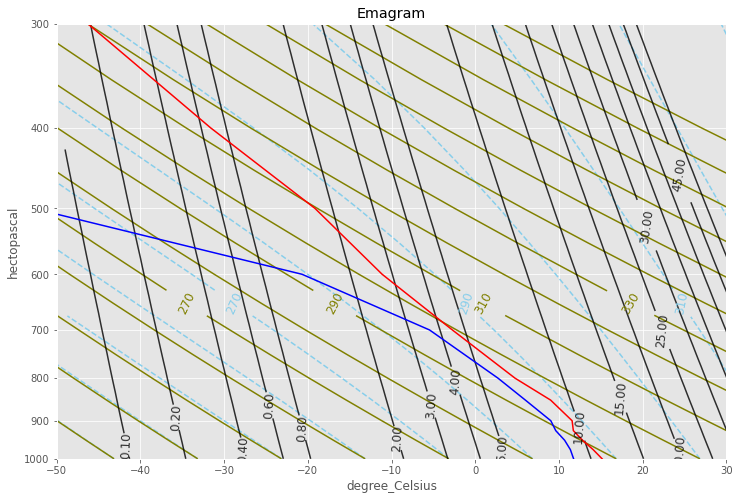

In [38]:
fig,ax=plt.subplots(figsize=(12,8),facecolor="w")
p=np.arange(1000,299,-50)

#断熱線
# for i in range(temperature2.size):
#     ax.plot(moist[i,:].to("degC"),press,linestyle="--",c="gray")
#     ax.plot(dry[i,:].to("degC"),press,c="gray")
cs_moist=ax.contour(moist.to("degC"),pptest,ttest,levels=temperature2,linestyles="--",colors="skyblue")
cs_dry=ax.contour(dry.to("degC"),pptest,ttest,levels=temperature2,colors="olive",linestyles="-")

ax.clabel(cs_moist,inline=1,levels=np.array(temperature2[::2]),fmt="%3d",rightside_up=True,fontsize=12)
ax.clabel(cs_dry,inline=1,levels=np.array(temperature2[::2]),fmt="%3d",rightside_up=True,fontsize=12)
#等飽和混合比線
cs_saturate=ax.contour(tt,pp,ws,levels=[0.01,0.1,0.2,0.4,0.6,0.8,2,3,4,5,10,15,20,25,30,35,40,45,50],extend="both",alpha=0.8,colors="k")
ax.clabel(cs_saturate,inline=1,levels=[0.01,0.1,0.2,0.4,0.6,0.8,2,3,4,5,10,15,20,25,30,35,40,45,50],fmt="%2.2f",rightside_up=True,fontsize=12)
#MSMの気温鉛直プロファイル
ax.plot(met_t,msm_press,c="r")
ax.plot(met_dew,msm_press,c="b")
#
ax.set_ylim(300,1000)
ax.invert_yaxis()
ax.set_yscale("log")
ax.set_xlim(-50,30)
ax.yaxis.set_major_locator(plt.FixedLocator(np.arange(300,1001,100)))
ax.yaxis.set_major_formatter(plt.ScalarFormatter())
ax.set_title("Emagram")

Text(0.5, 1.0, 'Emagram')

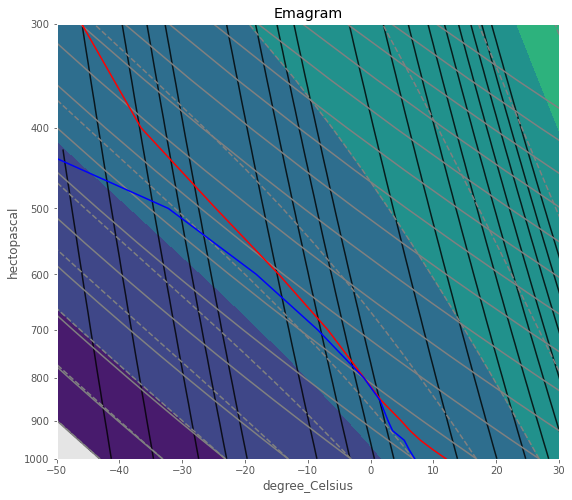

In [20]:
fig,ax=plt.subplots(figsize=(9,8),facecolor="w")
p=np.arange(1000,299,-50)

#断熱線
for i in range(temperature2.size):
    ax.plot(moist[i,:].to("degC"),press,linestyle="--",c="gray")
    ax.plot(dry[i,:].to("degC"),press,c="gray")
ax.contourf(moist.to("degC"),pptest,ttest)
#等飽和混合比線
cf=ax.contour(tt,pp,ws,levels=[0.01,0.1,0.2,0.4,0.6,0.8,2,3,4,5,10,15,20,25,30,35,40,45,50],extend="both",alpha=0.8,colors="k")
#MSMの気温鉛直プロファイル
ax.plot(met_t,msm_press,c="r")
ax.plot(met_dew,msm_press,c="b")
#
ax.set_ylim(300,1000)
ax.invert_yaxis()
#ax.set_yscale("function",functions=(forward,inverse))
ax.set_yscale("log")
ax.set_xlim(-50,30)
ax.yaxis.set_major_locator(plt.FixedLocator(np.arange(300,1001,100)))
ax.yaxis.set_major_formatter(plt.ScalarFormatter())
ax.set_title("Emagram")

In [15]:
pptest

Magnitude,[[230.0 230.0 230.0 230.0 230.0 230.0 230.0 230.0 230.0 230.0 230.0 230.0 230.0 230.0 230.0] [240.0 240.0 240.0 240.0 240.0 240.0 240.0 240.0 240.0 240.0 240.0 240.0 240.0 240.0 240.0] [250.0 250.0 250.0 250.0 250.0 250.0 250.0 250.0 250.0 250.0 250.0 250.0 250.0 250.0 250.0] [260.0 260.0 260.0 260.0 260.0 260.0 260.0 260.0 260.0 260.0 260.0 260.0 260.0 260.0 260.0] [270.0 270.0 270.0 270.0 270.0 270.0 270.0 270.0 270.0 270.0 270.0 270.0 270.0 270.0 270.0] [280.0 280.0 280.0 280.0 280.0 280.0 280.0 280.0 280.0 280.0 280.0 280.0 280.0 280.0 280.0] [290.0 290.0 290.0 290.0 290.0 290.0 290.0 290.0 290.0 290.0 290.0 290.0 290.0 290.0 290.0] [300.0 300.0 300.0 300.0 300.0 300.0 300.0 300.0 300.0 300.0 300.0 300.0 300.0 300.0 300.0] [310.0 310.0 310.0 310.0 310.0 310.0 310.0 310.0 310.0 310.0 310.0 310.0 310.0 310.0 310.0] [320.0 320.0 320.0 320.0 320.0 320.0 320.0 320.0 320.0 320.0 320.0 320.0 320.0 320.0 320.0] [330.0 330.0 330.0 330.0 330.0 330.0 330.0 330.0 330.0 330.0 330.0 330.0 330.0 330.0 330.0] [340.0 340.0 340.0 340.0 340.0 340.0 340.0 340.0 340.0 340.0 340.0 340.0 340.0 340.0 340.0] [350.0 350.0 350.0 350.0 350.0 350.0 350.0 350.0 350.0 350.0 350.0 350.0 350.0 350.0 350.0] [360.0 360.0 360.0 360.0 360.0 360.0 360.0 360.0 360.0 360.0 360.0 360.0 360.0 360.0 360.0] [370.0 370.0 370.0 370.0 370.0 370.0 370.0 370.0 370.0 370.0 370.0 370.0 370.0 370.0 370.0] [380.0 380.0 380.0 380.0 380.0 380.0 380.0 380.0 380.0 380.0 380.0 380.0 380.0 380.0 380.0] [390.0 390.0 390.0 390.0 390.0 390.0 390.0 390.0 390.0 390.0 390.0 390.0 390.0 390.0 390.0] [400.0 400.0 400.0 400.0 400.0 400.0 400.0 400.0 400.0 400.0 400.0 400.0 400.0 400.0 400.0]]
Units,kelvin
